In [64]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

from os import listdir
from os.path import isfile, join

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot
from pygents.token_plot import *


## Build models on "Brown" corpus versions across English, Russian, Chinese

### Complete models

In [3]:
if True:
    file = 'data/corpora/Brown/brown_nolines_en.txt'
    brown_en_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_en_chars_7.train(lines)
        print('lines',len(lines))

    brown_en_chars_7.store('data/models/brown_en_chars_7')

    print('parameters',brown_en_chars_7.count_params())
#parameters 10,734,812


lines 14342
parameters 10734812


In [4]:
if True:
    file = 'data/corpora/Brown/brown_nolines_ru.txt'
    brown_ru_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_ru_chars_7.train(lines)
        print('lines',len(lines))

    brown_ru_chars_7.store('data/models/brown_ru_chars_7')

    print('parameters',brown_ru_chars_7.count_params())
#parameters 14,724,909


lines 14342
parameters 14724909


In [5]:
if True:
    file = 'data/corpora/Brown/brown_nolines_zh.txt'
    brown_zh_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_zh_chars_7.train(lines)
        print('lines',len(lines))

    brown_zh_chars_7.store('data/models/brown_zh_chars_7')

    print('parameters',brown_zh_chars_7.count_params())
#parameters 26,079,635


lines 14342
parameters 26079635


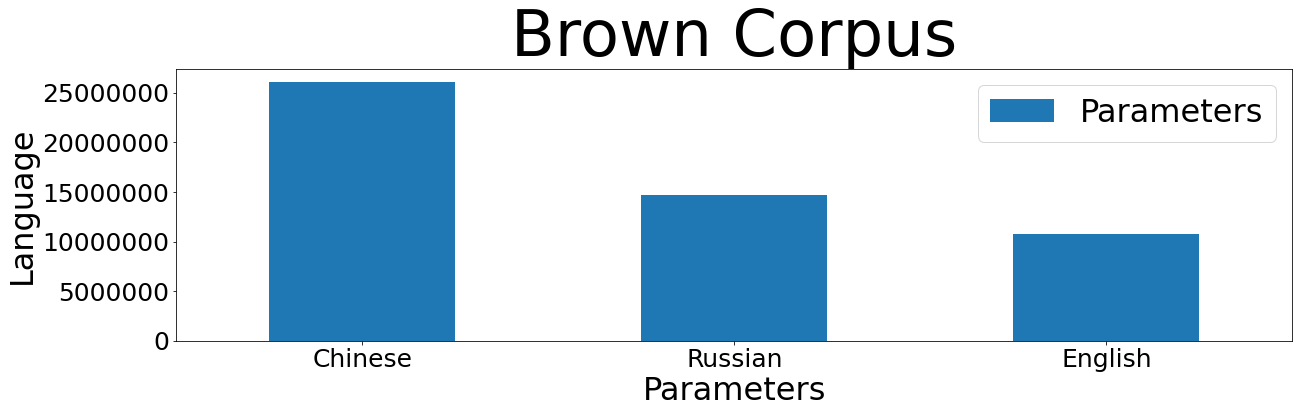

In [49]:
def plot_dict_bar(dic,labels,values,title=None,head=None,size=None,debug=False):
    plt.rcParams["figure.figsize"] = (20,5) if size is None else size 
    plt.rc('legend',fontsize=32)
    df = pd.DataFrame([(key, dic[key]) for key in dic],columns=[labels,values])
    df.sort_values(values,ascending=False,inplace=True)
    if debug:
        print(df)
    if head is not None:
        df = df[:head]
    p = df[[labels,values]].plot.bar(x=labels);
    p.get_yaxis().get_major_formatter().set_scientific(False)
    if title is not None:
        fontsize = 64 if len(title) < 64 else round(64 / len(title))
        plt.title(title,fontsize = fontsize)
    ticksize=1+round(24/len(labels[0]))
    p = plt.xticks(rotation='horizontal',fontsize=ticksize)
    p = plt.yticks(rotation='horizontal',fontsize=ticksize)
    plt.xlabel(values, fontsize=32)
    plt.ylabel(labels, fontsize=32)


plot_dict_bar({'English':10734812,'Russian':14724909,'Chinese':26079635},'Language','Parameters',title='Brown Corpus',
              head=None)


### Bi-split models for cross-validation

In [58]:
if True:
    file = 'data/corpora/Brown/brown_nolines_en.txt'
    brown_en_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_en_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_en_chars_7_test1.train(lines1)
        brown_en_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_en_chars_7_test1.store('data/models/brown_en_chars_7_test1')
    brown_en_chars_7_test2.store('data/models/brown_en_chars_7_test2')

    print('parameters 1',brown_en_chars_7_test1.count_params())
    print('parameters 2',brown_en_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 7200678
parameters 2 7047337


In [59]:
if True:
    file = 'data/corpora/Brown/brown_nolines_ru.txt'
    brown_ru_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_ru_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_ru_chars_7_test1.train(lines1)
        brown_ru_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_ru_chars_7_test1.store('data/models/brown_ru_chars_7_test1')
    brown_ru_chars_7_test2.store('data/models/brown_ru_chars_7_test2')

    print('parameters 1',brown_ru_chars_7_test1.count_params())
    print('parameters 2',brown_ru_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 9573010
parameters 2 9355647


In [60]:
if True:
    file = 'data/corpora/Brown/brown_nolines_zh.txt'
    brown_zh_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_zh_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_zh_chars_7_test1.train(lines1)
        brown_zh_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_zh_chars_7_test1.store('data/models/brown_zh_chars_7_test1')
    brown_zh_chars_7_test2.store('data/models/brown_zh_chars_7_test2')

    print('parameters 1',brown_zh_chars_7_test1.count_params())
    print('parameters 2',brown_zh_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 13956109
parameters 2 13487762


## Perform meta-learning search for the best hyper-parameters with Magicdata test set

### English

In [ ]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_en = list(test_df['en'])
print(len(test_en))
test_en


In [ ]:
ref_tokenizer = DelimiterTokenizer()
model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

base = FreedomTokenizer(name='data/models/brown_en_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown English, n=7, dvf- & dvf+'
metric100_list_en = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_en,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_en.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


In [ ]:
base1 = FreedomTokenizer(name='data/models/brown_en_chars_7_test1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_en_chars_7_test2',max_n=7,mode='chars',debug=False)
title = 'Brown English, n=7, dvf- & dvf+, cross split'
cross100_f_list_en = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_en,
        FreedomBasedTokenizer(base1,'dvf-','dvf+'),
        FreedomBasedTokenizer(base2,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross100_f_list_en.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


### Russian

In [62]:
path = 'data/corpora/Russian/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_ru = list(test_df['ru'])
print(len(test_ru))
test_ru


100


['Как насчет медицинской страховки? В случае вашей семьи, её можно оформить и взрослому и ребенку.',
 'Для тех, у кого есть страховка, по договору страхования они получат компенсацию в размере 300 тысяч рублей.',
 'Необходимо осознать важность наличия страховки.',
 'На самом деле, это явление действительно очень распространено, например, для страхования от несчастных случаев, чем больше вы покупаете, тем больше страхуете.',
 'Этому поколению родителей действительно необходимо покупать страховку.',
 'Ну, прямо сейчас действительно желательно купить страховку.',
 'Машину нужно покупать в полном объеме, а дом можно купить в кредит.',
 'Вы можете купить страховку, страховка, конечно же, делится на множество категорий.',
 'Медицинская страховка очень важна.',
 'Эту часть денег платит страховая компания.',
 'Послушайте, я не знаю, слышали ли вы когда-нибудь об этом, это страховка в Сбере.',
 'Покупка дома на самом деле является инвестицией.',
 'Вы когда-нибудь узнавали об обучении в Альфе?',

14724909


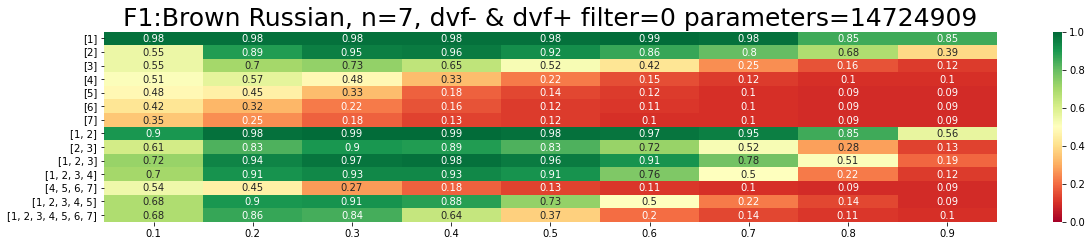

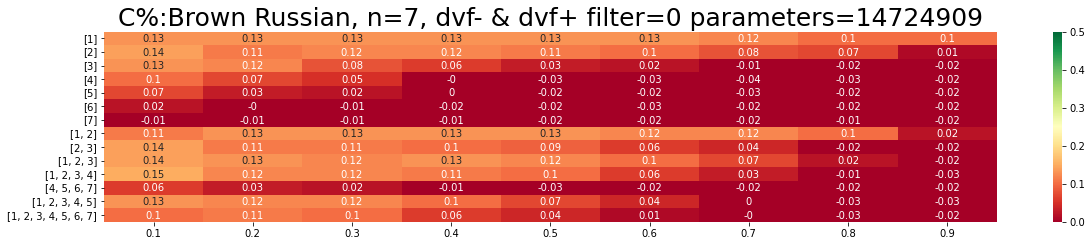

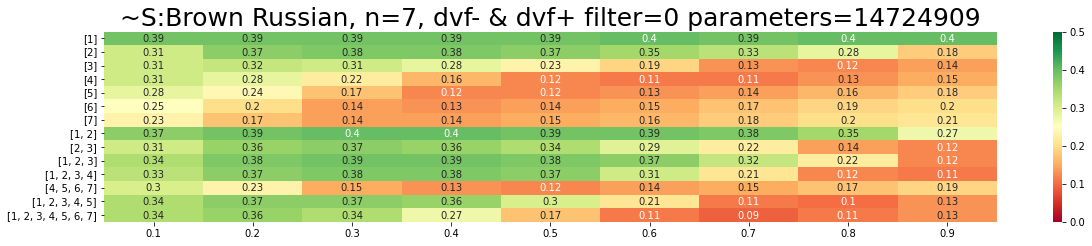

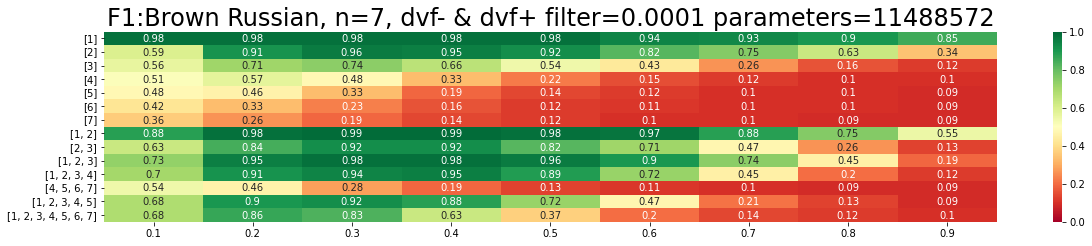

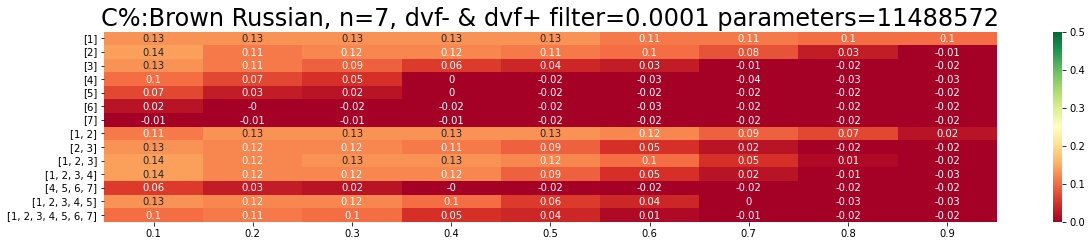

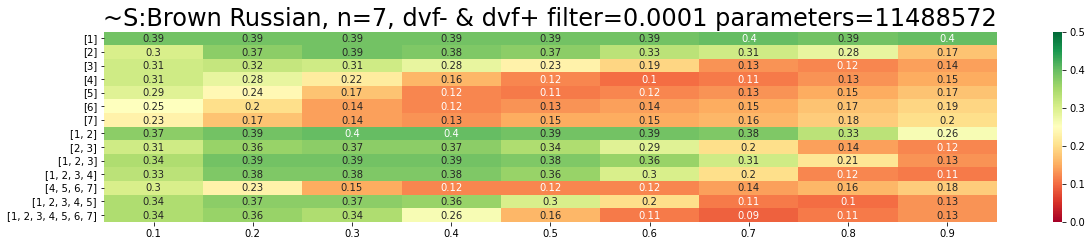

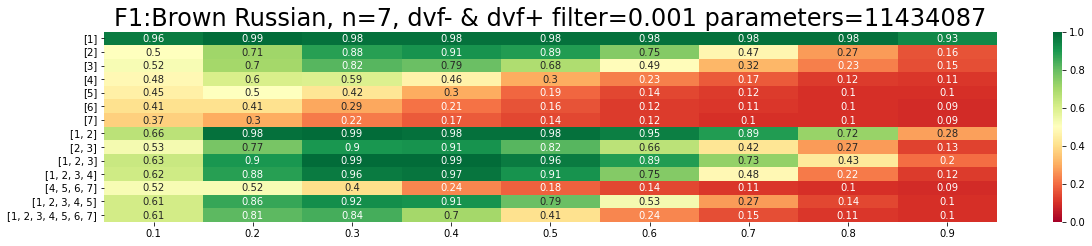

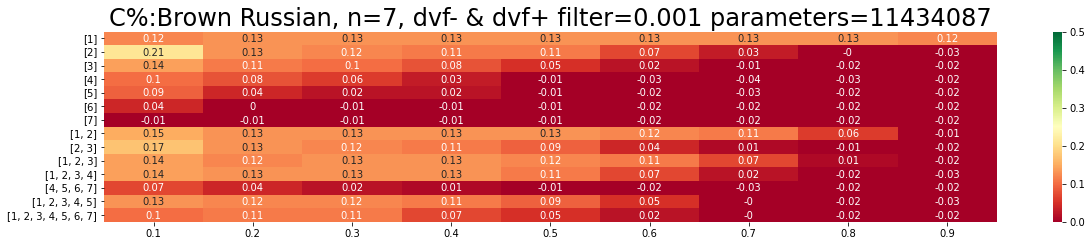

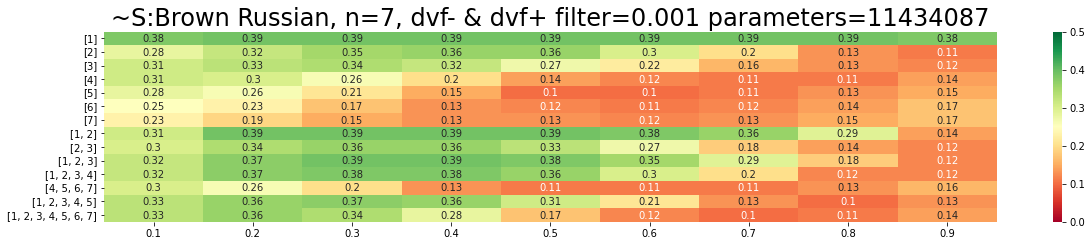

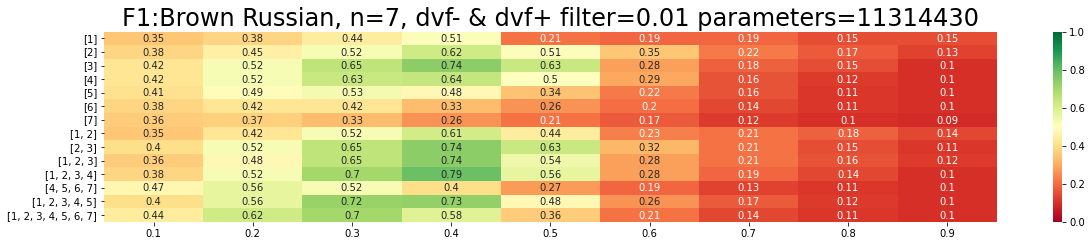

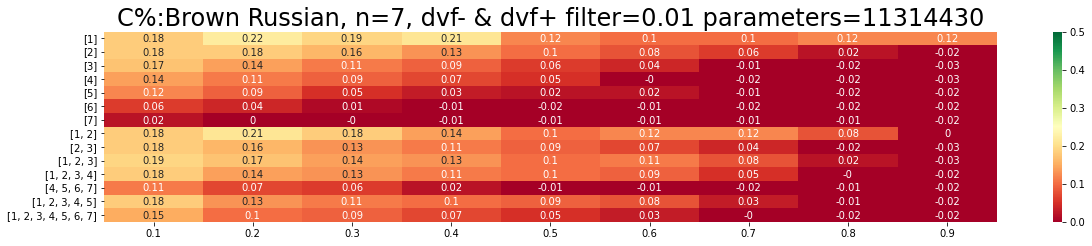

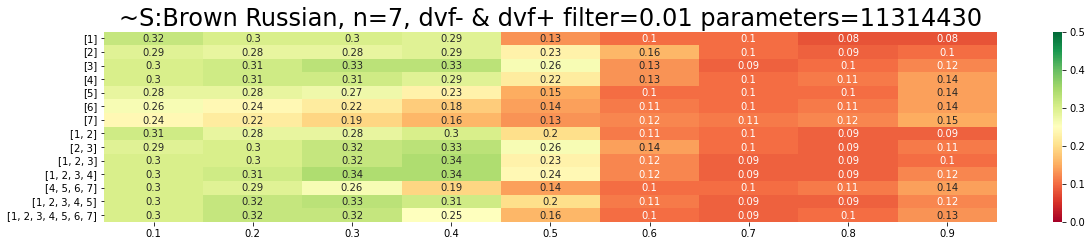

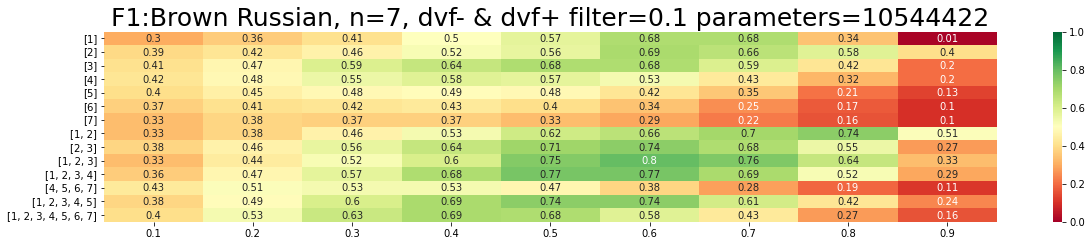

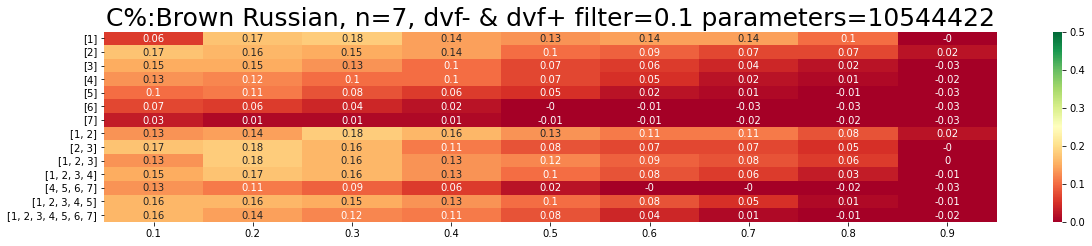

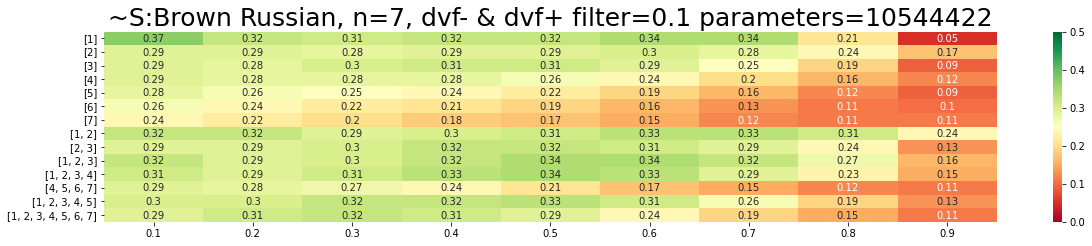

In [67]:
ref_tokenizer = DelimiterTokenizer()
model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

base = FreedomTokenizer(name='data/models/brown_ru_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Russian, n=7, dvf- & dvf+'
metric100_list_ru = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_ru,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_ru.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


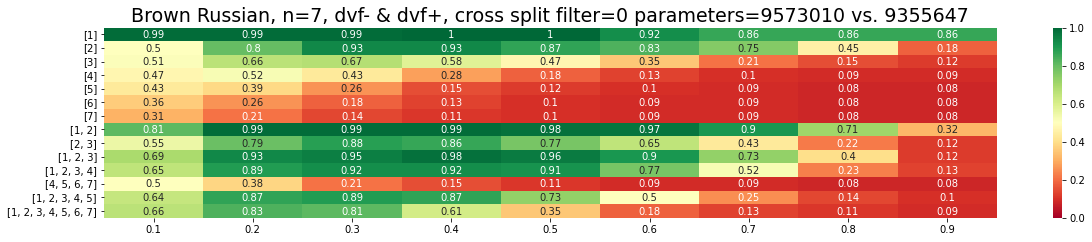

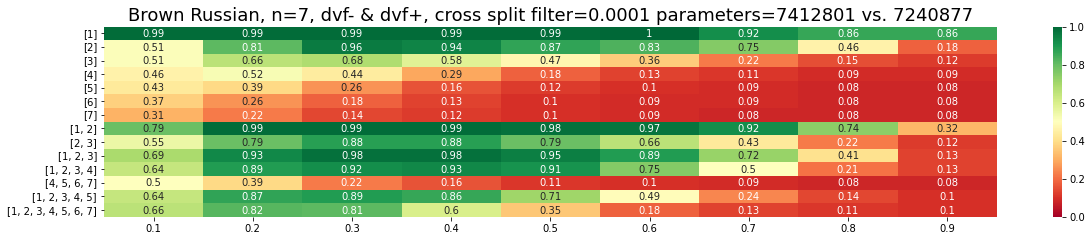

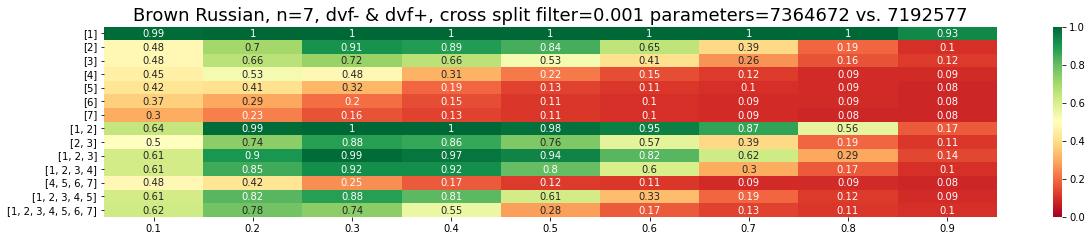

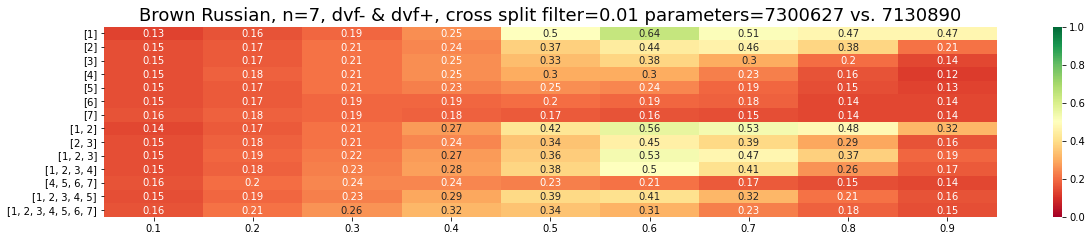

In [ ]:
base1 = FreedomTokenizer(name='data/models/brown_ru_chars_7_test1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_ru_chars_7_test2',max_n=7,mode='chars',debug=False)
title = 'Brown Russian, n=7, dvf- & dvf+, cross split'
cross100_f_list_ru = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_ru,
        FreedomBasedTokenizer(base1,'dvf-','dvf+'),
        FreedomBasedTokenizer(base2,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross100_f_list_ru.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


### Chinese 

In [ ]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_zh = list(test_df['zh'])
print(len(test_zh))
test_zh


In [ ]:
ref_tokenizer = JiebaTokenizer()

model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]


In [ ]:
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
#token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, dvf- & dvf+'
metric100_list_zh_dvft1 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_dvft1.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


In [ ]:
#token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, dvf- & dvf+'
metric100_list_zh_dvft01 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_dvft01.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


In [ ]:
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
#token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, peak- & peak+'
metric100_list_zh_peakt1 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_peakt1.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


In [ ]:
#token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, peak- & peak+'
metric100_list_zh_peakt01 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_peakt01.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


In [ ]:
#TODO en/ru dvf 100 (PROGRESS)
#TODO zh dvf/peak 100 (PROGRESS)
#TODO zh peak 100
#TODO en/ru/zh 1000 

#TODO https://magichub.com/datasets/chinese-english-parallel-corpus-finance/ - Creative Commons!? (email sent)

#summary
#TODO en/ru peak 100/1000 (PROGRESS)
